# Наивный байесовский классификатор
Цель работы
Научиться применять модели наивного байесовского классификатора с использованием библиотеки sklearn для решения задач машинного обучения.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer 

data = load_breast_cancer()

In [3]:
X = data.data[:,:2]
y = data.target

In [6]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

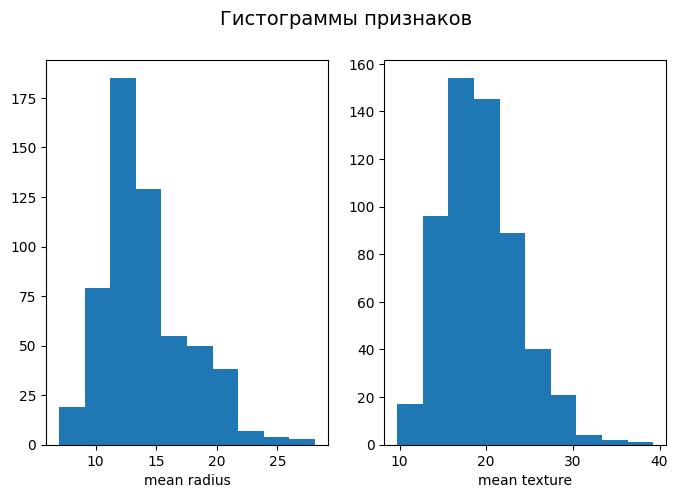

In [11]:
plt.figure(figsize=(8, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [13]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
gaussian_nb = GaussianNB()

In [14]:
gaussian_nb.fit(X, y)

GaussianNB()

In [15]:
y_pred = gaussian_nb.predict(X)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


In [19]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [20]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


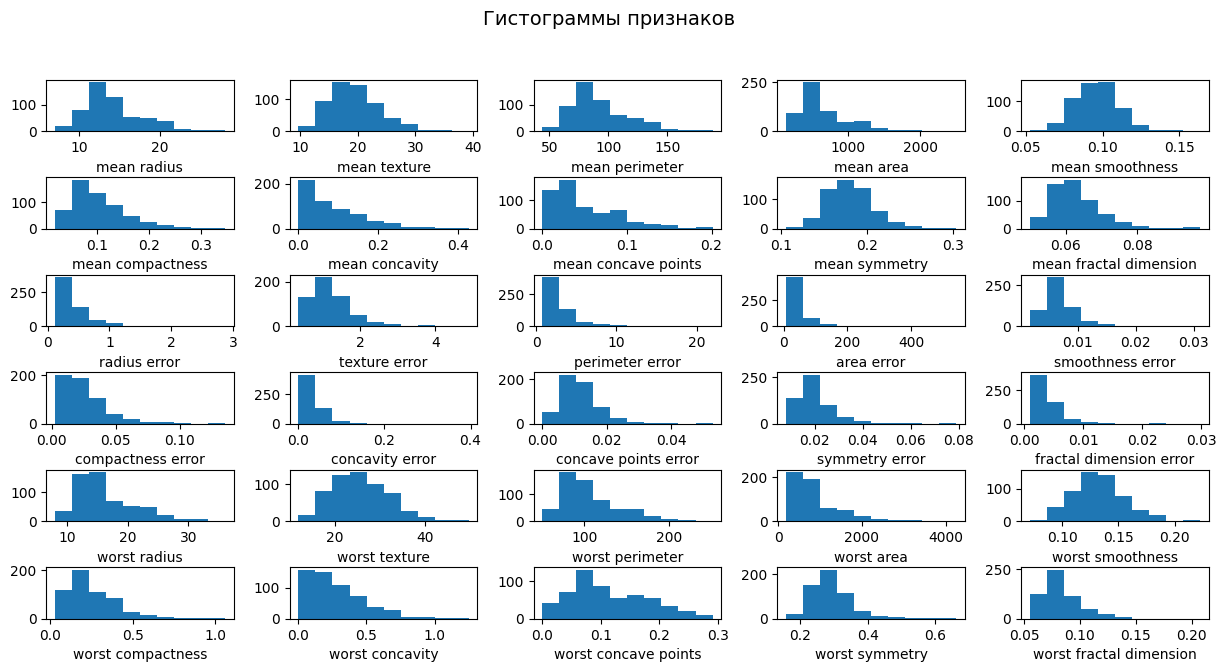

In [21]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [23]:
df.head()

,mean radius,mean texture,target
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0


In [24]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


# 1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [25]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

# Мультиномиальный Байес
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X, y)
y_pred_multinomial = multinomial_nb.predict(X)
print(f"MultinomialNB Accuracy: {accuracy_score(y, y_pred_multinomial):.2f}")

# Бернулли Байес
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X > X.mean(), y)  # Бинаризация данных
y_pred_bernoulli = bernoulli_nb.predict(X > X.mean())
print(f"BernoulliNB Accuracy: {accuracy_score(y, y_pred_bernoulli):.2f}")

# Комплементарный Байес
complement_nb = ComplementNB()
complement_nb.fit(X, y)
y_pred_complement = complement_nb.predict(X)
print(f"ComplementNB Accuracy: {accuracy_score(y, y_pred_complement):.2f}")

MultinomialNB Accuracy: 0.90
BernoulliNB Accuracy: 0.80
ComplementNB Accuracy: 0.89


# 2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [26]:
titanic = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.6%20bayes/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Загрузка данных
titanic = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.6%20bayes/data/titanic.csv")

# Выделение признаков и целевой переменной
X = titanic.drop(columns=["PassengerId", "Survived"])  # Признаки
y = titanic["Survived"]  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


# 3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [31]:
titanic_kaggle = pd.read_csv(r"C:\Users\alesh\Downloads\Titanic-Dataset.csv")
titanic_kaggle.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Предобработка данных
titanic_kaggle = titanic_kaggle.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])  # Удаление ненужных столбцов

# Кодирование категориальных переменных
titanic_kaggle["Sex"] = titanic_kaggle["Sex"].map({"male": 0, "female": 1})
titanic_kaggle["Embarked"] = titanic_kaggle["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Заполнение пропущенных значений
titanic_kaggle["Age"] = titanic_kaggle["Age"].fillna(titanic_kaggle["Age"].median())
titanic_kaggle["Embarked"] = titanic_kaggle["Embarked"].fillna(titanic_kaggle["Embarked"].mode()[0])

# Выделение признаков и целевой переменной
X = titanic_kaggle.drop(columns=["Survived"])
y = titanic_kaggle["Survived"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78



# Контрольные вопросы

1. **Какие условия должны выполняться в данных, чтобы можно было применять наивную байесовскую модель?**  
   - Признаки должны быть независимы друг от друга (условная независимость).

2. **Какие виды непрерывных распределений существуют и наиболее распространены?**  
   - Нормальное, экспоненциальное, равномерное и гамма-распределение.

3. **Как определить вид распределения численной переменной в датасете?**  
   - С помощью гистограмм, плотности распределения, а также тестов на нормальность (например, Шапиро-Уилка).

4. **Как наивная байесовская модель работает с категориальными признаками?**  
   - Использует вероятностное распределение категорий (например, CategoricalNB).

5. **Зачем при применении наивного байесовского классификатора может понадобится анализировать форму эмпирического распределения признаков?**  
   - Для выбора подходящего распределения (например, нормального для GaussianNB).

6. **В чем особенность модели категориального наивного Байеса?**  
   - Она работает с дискретными категориальными данными, что позволяет учитывать вероятности для каждого значения категории.
